In [1]:
#type:ignore
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
mat = sio.loadmat('/content/A01T.mat')

In [5]:
variable_names = [key for key in mat.keys() ]
print(variable_names)

['__header__', '__version__', '__globals__', 'data']


In [6]:
eeg_data_struct = mat['data']
eeg_data_struct

array([[array([[(array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
                        -13.671875  , -43.9453125 ],
                       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
                        -13.18359375, -40.52734375],
                       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
                         -8.30078125, -38.57421875],
                       ...,
                       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
                        -40.52734375, -19.53125   ],
                       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
                        -48.33984375, -12.6953125 ],
                       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
                        -42.96875   ,  -9.27734375]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='

In [7]:
eeg_data = np.array([trial[0][0]['X'] for trial in eeg_data_struct])

In [8]:
tr=eeg_data_struct[0]
print(tr[0][0]['X'])

[array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
         -13.671875  , -43.9453125 ],
        [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
         -13.18359375, -40.52734375],
        [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
          -8.30078125, -38.57421875],
        ...,
        [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
         -40.52734375, -19.53125   ],
        [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
         -48.33984375, -12.6953125 ],
        [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
         -42.96875   ,  -9.27734375]])                               ]


In [9]:
print(tr[0][0]['y'])
print(tr[0][0]['fs'])
print(tr[0][0]['classes'])
print(tr[0][0]['gender'])
print(tr[0][0]['age'])

[array([], shape=(0, 1), dtype=uint8)]
[array([[250]], dtype=uint8)]
[array([[array(['left hand'], dtype='<U9'),
         array(['right hand'], dtype='<U10'),
         array(['feet'], dtype='<U4'), array(['tongue'], dtype='<U6')]],
       dtype=object)                                                    ]
[array(['female'], dtype='<U6')]
[array([[22]], dtype=uint8)]


In [10]:
print(tr[1][0]['y'])
print(tr[1][0]['fs'])
print(tr[1][0]['classes'])
print(tr[1][0]['gender'])
print(tr[1][0]['age'])

[array([], shape=(0, 1), dtype=uint8)]
[array([[250]], dtype=uint8)]
[array([[array(['left hand'], dtype='<U9'),
         array(['right hand'], dtype='<U10'),
         array(['feet'], dtype='<U4'), array(['tongue'], dtype='<U6')]],
       dtype=object)                                                    ]
[array(['female'], dtype='<U6')]
[array([[22]], dtype=uint8)]


In [11]:
print(len(tr))

9


In [12]:
print(tr[8][0]['X'])

[array([[-15.28320312, -13.33007812, -12.15820312, ..., -19.04296875,
         -59.08203125,   3.90625   ],
        [-13.42773438, -11.18164062, -10.79101562, ...,  -8.7890625 ,
         -53.7109375 ,  15.625     ],
        [-20.80078125, -20.3125    , -18.89648438, ..., -18.06640625,
         -62.01171875,  13.671875  ],
        ...,
        [  5.51757812,  10.49804688,  14.94140625, ...,   6.34765625,
         -37.109375  ,  16.6015625 ],
        [  1.46484375,   3.07617188,   9.22851562, ...,  -4.39453125,
         -47.8515625 ,  12.6953125 ],
        [  1.3671875 ,   3.515625  ,   7.86132812, ...,  -4.39453125,
         -45.41015625,   7.8125    ]])                               ]


In [13]:
print(tr[8][0]['y'])
print(tr[8][0]['fs'])
print(tr[8][0]['classes'])
print(tr[8][0]['gender'])
print(tr[8][0]['age'])

[array([[1],
        [4],
        [2],
        [4],
        [4],
        [3],
        [4],
        [4],
        [3],
        [2],
        [4],
        [3],
        [1],
        [2],
        [2],
        [2],
        [3],
        [2],
        [4],
        [3],
        [4],
        [2],
        [3],
        [1],
        [4],
        [1],
        [3],
        [4],
        [1],
        [3],
        [1],
        [2],
        [2],
        [1],
        [4],
        [1],
        [4],
        [3],
        [3],
        [1],
        [3],
        [2],
        [2],
        [1],
        [3],
        [1],
        [2],
        [1]], dtype=uint8)]
[array([[250]], dtype=uint8)]
[array([[array(['left hand'], dtype='<U9'),
         array(['right hand'], dtype='<U10'),
         array(['feet'], dtype='<U4'), array(['tongue'], dtype='<U6')]],
       dtype=object)                                                    ]
[array(['female'], dtype='<U6')]
[array([[22]], dtype=uint8)]


In [14]:
for i in tr:
    print(len(i[0]['y'][0]))

0
0
0
48
48
48
48
48
48


In [15]:
for i in tr:
    print(i[0]['y'])

[array([], shape=(0, 1), dtype=uint8)]
[array([], shape=(0, 1), dtype=uint8)]
[array([], shape=(0, 1), dtype=uint8)]
[array([[4],
        [3],
        [2],
        [1],
        [1],
        [2],
        [3],
        [4],
        [2],
        [3],
        [1],
        [1],
        [1],
        [4],
        [2],
        [2],
        [1],
        [1],
        [3],
        [1],
        [2],
        [4],
        [4],
        [3],
        [1],
        [4],
        [4],
        [2],
        [4],
        [4],
        [2],
        [1],
        [2],
        [3],
        [3],
        [3],
        [4],
        [3],
        [1],
        [4],
        [2],
        [3],
        [2],
        [3],
        [4],
        [2],
        [3],
        [1]], dtype=uint8)]
[array([[1],
        [1],
        [4],
        [2],
        [1],
        [3],
        [1],
        [3],
        [2],
        [4],
        [1],
        [3],
        [3],
        [1],
        [3],
        [2],
        [4],
        [4],
        [4

In [16]:
valid_data = []
valid_labels = []

for i, trial in enumerate(tr):
    y_field = trial[0]['y']
    x_field = trial[0]['X']

    if y_field.size > 0:
        valid_data.append(x_field)
        valid_labels.append(y_field)

valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)
print(f"Shape of valid data: {len(valid_data.shape)}")
print(f"SHape for the valid trial: {valid_labels.shape}")

Shape of valid data: 2
SHape for the valid trial: (9, 1)


In [17]:
print(f"First trial data shape: {valid_data[0].shape}")
print(f"First trial label: {valid_labels[0]}")

First trial data shape: (1,)
First trial label: [array([], shape=(0, 1), dtype=uint8)]


In [18]:
print(f"Shape of first trial data: {valid_data[0].shape}")
print(f"Shape of last trial data: {valid_data[-1].shape}")

Shape of first trial data: (1,)
Shape of last trial data: (1,)


In [19]:
valid_data = np.array(valid_data)
print(f"Shape of valid_data after conversion: {valid_data.shape}")

Shape of valid_data after conversion: (9, 1)


In [20]:
valid_data = np.expand_dims(valid_data, axis=-1)
print(f"Reshaped valid data: {valid_data.shape}")

Reshaped valid data: (9, 1, 1)


In [21]:
for i, trial in enumerate(tr):
    x_field = trial[0]['X']
    print(f"Trial {i} X_field shape: {x_field.shape}")


Trial 0 X_field shape: (1,)
Trial 1 X_field shape: (1,)
Trial 2 X_field shape: (1,)
Trial 3 X_field shape: (1,)
Trial 4 X_field shape: (1,)
Trial 5 X_field shape: (1,)
Trial 6 X_field shape: (1,)
Trial 7 X_field shape: (1,)
Trial 8 X_field shape: (1,)


In [22]:
for i, trial in enumerate(tr):
    x_field = trial[0]['X']
    print(f"Trial {i} X_field: {x_field}")

Trial 0 X_field: [array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
         -13.671875  , -43.9453125 ],
        [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
         -13.18359375, -40.52734375],
        [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
          -8.30078125, -38.57421875],
        ...,
        [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
         -40.52734375, -19.53125   ],
        [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
         -48.33984375, -12.6953125 ],
        [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
         -42.96875   ,  -9.27734375]])                               ]
Trial 1 X_field: [array([[  2.05078125,   2.83203125,  -0.92773438, ...,  -6.8359375 ,
          15.625     ,  -8.7890625 ],
        [ -2.63671875,  -1.85546875,  -3.41796875, ...,  -8.7890625 ,
           1.46484375, -21.97265625],
        [ -9.765625  ,  -5.90820312,  -9.5703125 , ..., 

In [23]:
valid_data = []
valid_labels = []

for i, trial in enumerate(tr):
    y_field = trial[0]['y']
    x_field = trial[0]['X']

    # Unwrapping nested data if necessary
    if isinstance(x_field, np.ndarray) and x_field.size > 0:
        x_field = x_field[0]  # Try accessing the first element
    else:
        print(f"Unexpected format for X_field in Trial {i}: {x_field}")
        continue

    if y_field.size > 0:
        if(len(y_field[0]>0)):
            valid_data.append(x_field)  # Append unwrapped data
            valid_labels.append(y_field[0][0])  # Append label value
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print(f"Shape of valid_data: {valid_data.shape}")
print(f"Shape of valid_labels: {valid_labels.shape}")


Shape of valid_data: (6, 96735, 25)
Shape of valid_labels: (6, 1)


In [24]:
valid_data = (valid_data - np.mean(valid_data, axis=1, keepdims=True)) / np.std(valid_data, axis=1, keepdims=True)

In [25]:
window_size = 250  # 1 second
step_size = 250    # No overlap

segmented_data = []
segmented_labels = []

for i, trial_data in enumerate(valid_data):
    num_segments = (trial_data.shape[0] - window_size) // step_size + 1
    for j in range(num_segments):
        start = j * step_size
        end = start + window_size
        segmented_data.append(trial_data[start:end, :])
        segmented_labels.append(valid_labels[i])

segmented_data = np.array(segmented_data)
segmented_labels = np.array(segmented_labels).flatten()
print(f"Segmented Data Shape: {segmented_data.shape}")
print(f"Segmented Labels Shape: {segmented_labels.shape}")


Segmented Data Shape: (2316, 250, 25)
Segmented Labels Shape: (2316,)


In [26]:
segmented_labels = to_categorical(segmented_labels)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(segmented_data, segmented_labels, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1852, 250, 25), (464, 250, 25), (1852, 5), (464, 5))

In [29]:
def build_cnn(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
input_shape = (X_train.shape[1], X_train.shape[2])
input_shape

(250, 25)

In [31]:
num_classes = y_train.shape[1]
num_classes

5

In [32]:
model = build_cnn(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 248, 64)             │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 124, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 122, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 61, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7808)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         499,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,669 (2.02 MB)

 Trainable params: 529,669 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
epc = 50
bs = 32

In [35]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epc,
    batch_size=bs
)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.2817 - loss: 1.6355 - val_accuracy: 0.3168 - val_loss: 1.3602
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.3581 - val_accuracy: 0.3039 - val_loss: 1.2995
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3756 - loss: 1.2870 - val_accuracy: 0.2953 - val_loss: 1.2613
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4074 - loss: 1.2303 - val_accuracy: 0.3815 - val_loss: 1.2311
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4357 - loss: 1.1692 - val_accuracy: 0.4224 - val_loss: 1.2065
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4962 - loss: 1.0810 - val_accuracy: 0.3642 - val_loss: 1.2557
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5215 - loss: 1.0469 - val_accuracy: 0.3836 - val_loss: 1.2443
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5758 - loss: 0.9443 - val_accuracy: 0.4095 - val_loss

In [36]:
model.save('eeg_cnn_model.h5')

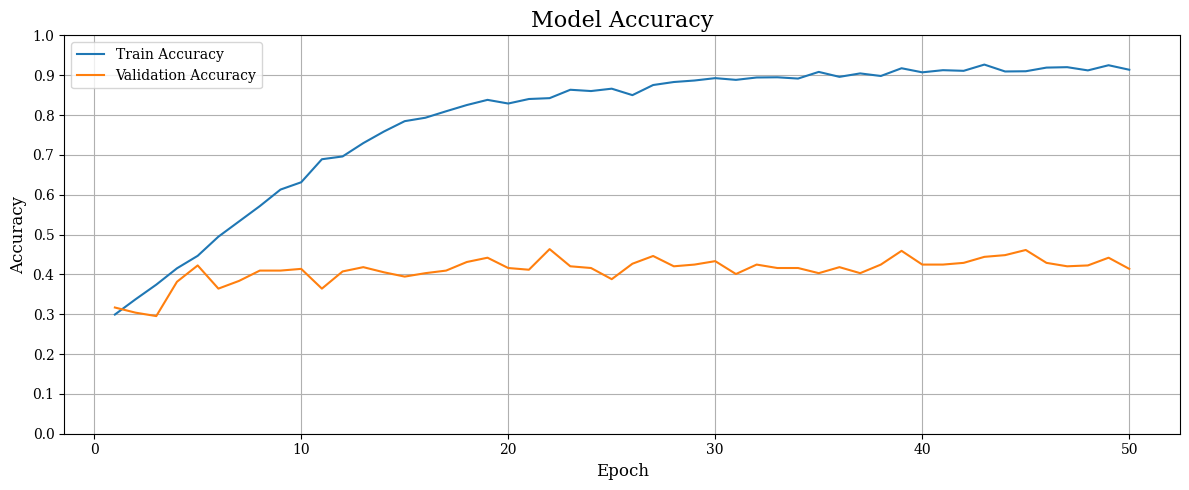

In [37]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Accuracy', fontsize=16)

plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(11)])

plt.tight_layout()
plt.grid()
plt.show()

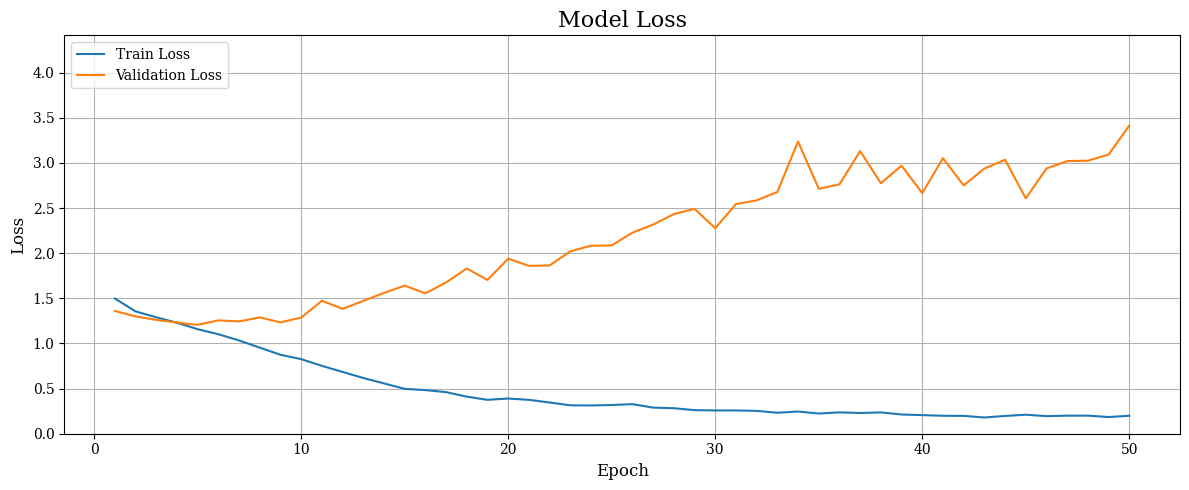

In [38]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Loss', fontsize=16)

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')

plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0,1 + max(max(history.history['loss']), max(history.history['val_loss'])))

plt.tight_layout()
plt.grid()
plt.show()

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4274 - loss: 3.3501 
Test accuracy: 0.4137931168079376


In [40]:
def build_lstm(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [46]:
lstm_model = build_lstm((X_train.shape[1], X_train.shape[2]), y_train.shape[1])
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2822 - loss: 1.5166 - val_accuracy: 0.3168 - val_loss: 1.3716
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3038 - loss: 1.4092 - val_accuracy: 0.3039 - val_loss: 1.3525
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3358 - loss: 1.3822 - val_accuracy: 0.3125 - val_loss: 1.3492
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3276 - loss: 1.3628 - val_accuracy: 0.3125 - val_loss: 1.3560
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3757 - loss: 1.3354 - val_accuracy: 0.3254 - val_loss: 1.3404
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3930 - loss: 1.3024 - val_accuracy: 0.3319 - val_loss: 1.3348
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4025 - loss: 1.3146 - val_accuracy: 0.3319 - val_loss: 1.3415
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3836 - loss: 1.3207 - val_accuracy: 0.3233 - v

In [47]:
model.save('eeg_rnn_model.h5')

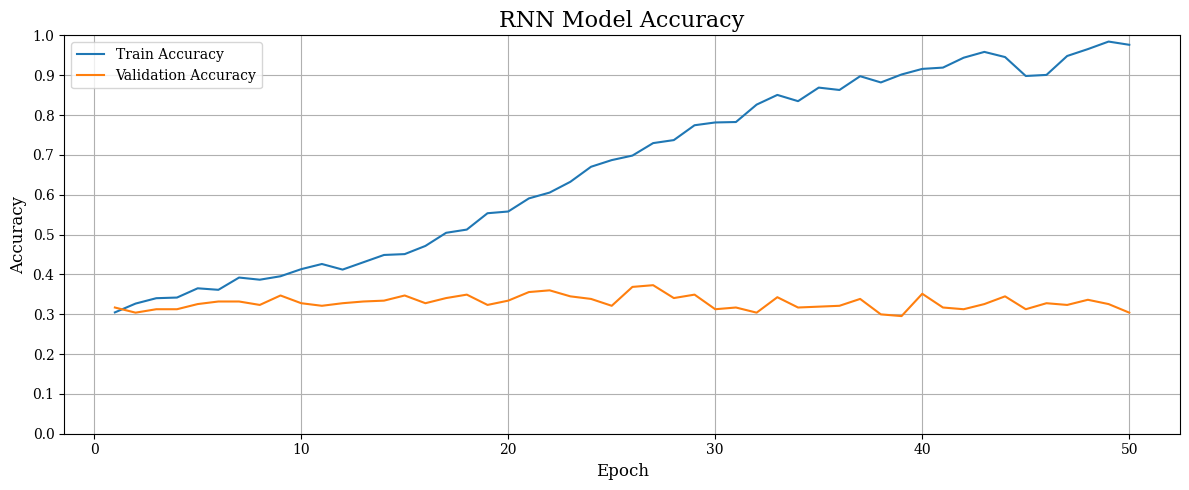

In [48]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('RNN Model Accuracy', fontsize=16)

plt.plot(range(1, len(lstm_history.history['accuracy']) + 1), lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(lstm_history.history['val_accuracy']) + 1), lstm_history.history['val_accuracy'], label='Validation Accuracy')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(11)])

plt.tight_layout()
plt.grid()
plt.show()

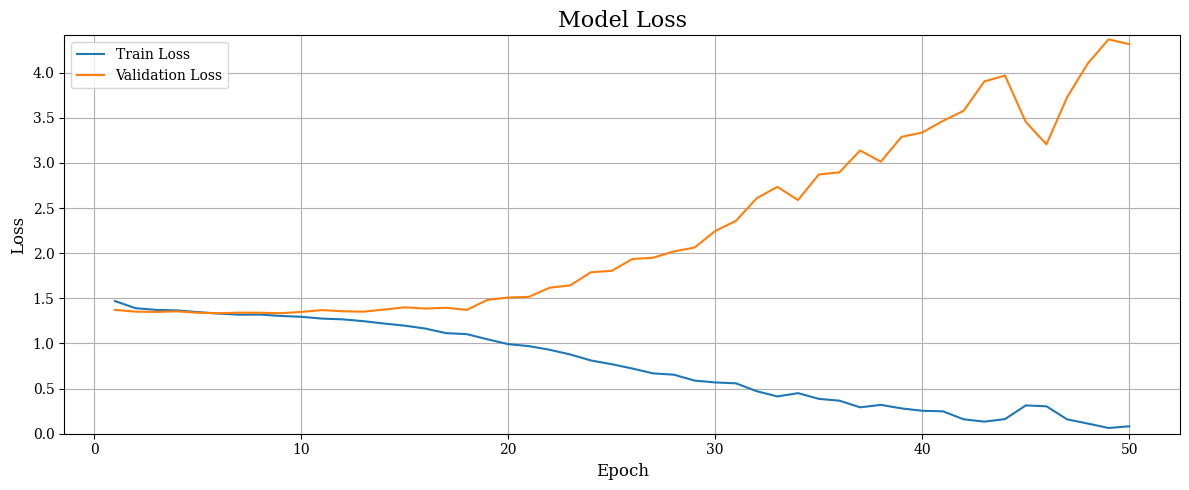

In [49]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Loss', fontsize=16)

plt.plot(range(1, len(lstm_history.history['loss']) + 1), lstm_history.history['loss'], label='Train Loss')
plt.plot(range(1, len(lstm_history.history['val_loss']) + 1), lstm_history.history['val_loss'], label='Validation Loss')

plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0,1 + max(max(history.history['loss']), max(history.history['val_loss'])))

plt.tight_layout()
plt.grid()
plt.show()

In [50]:
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3196 - loss: 4.2365
Test accuracy: 0.3038793206214905


In [52]:
from sklearn.svm import SVC

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_flat, y_train.argmax(axis=1))
print("SVM Test Accuracy:", svm_model.score(X_test_flat, y_test.argmax(axis=1)))


SVM Test Accuracy: 0.3146551724137931


In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_flat, y_train.argmax(axis=1))
print("Random Forest Test Accuracy:", rf_model.score(X_test_flat, y_test.argmax(axis=1)))


Random Forest Test Accuracy: 0.4245689655172414
